SANGINETO JUCÁ Marina and MOREIRA TEIXEIRA Luiz Fernando

This second practical work, on motion estimation, deals with parametric motion estimation. You have to reuse some of the functions you implemented during the first practical work.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [27]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
from scipy.signal import convolve2d
from cv2 import copyMakeBorder,BORDER_REPLICATE

# Parametric estimation
In this second practical work, we will work on parametric estimation, both using direct and indirect methods.
## I- Direct parametric estimation
## I-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

**Recall the expression of the 2D discrete time Fourier transform (DTFT).**

**Answer:**

$$
\hat{a}(\nu_x,\nu_y) = \sum_{n,m = - \infty}^\infty a(n,m)e^{-i2\pi(n\nu_x + m\nu_y)}
$$

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). **Compute the DTFT** of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

**Answer:** 

Let's apply the definition of DTFT in b(n,m):

$$
\hat{b}(\nu_x,\nu_y) = \sum_{n,m = - \infty}^\infty b(n,m)e^{-i2\pi(n\nu_x + m\nu_y)} = \sum_{n,m = - \infty}^\infty a(n+c,m+d)e^{-i2\pi(n\nu_x + m\nu_y)}
$$

By performing a change of variable, let $u = n + c$ and $v = m + d$

Thus we get:

$$
\hat{b}(\nu_x,\nu_y) = \sum_{u=c,v=d}^\infty a(u,v)e^{-i2\pi((u-c)\nu_x + (v-d)\nu_y)}
$$

Therefore,

$$
\hat{b}(\nu_x,\nu_y) = \underbrace{\sum_{u=c,v=d}^\infty a(u,v)e^{-i2\pi(u\nu_x + v\nu_y)}}_{\hat{a}(\nu_x,\nu_y)}e^{i2\pi(c\nu_x + d\nu_y)} 
$$

And finally:

$$
\hat{b}(\nu_x,\nu_y) = \hat{a}(\nu_x,\nu_y)e^{i2\pi(c\nu_x + d\nu_y)} 
$$


**Show that the ratio between the DTFTs is:**
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Answer:**

It becomes very clear looking at the previous questions that by doing 

\begin{align*}
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} &= \frac{\hat{a}(\nu_x,\nu_y)e^{i2\pi(c\nu_x + d\nu_y)}}{\hat{a}(\nu_x,\nu_y)} \\
&= \underbrace{\frac{\hat{a}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)}}_{\text{In}} e^{i2\pi(c\nu_x + d\nu_y)} \\
&= \exp(i2\pi (c\nu_x + d \nu_y))
\end{align*}

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

**Recall the expression of the DFT.**

**Answer :**

$$
\hat{A}(k_x,k_y) = \sum_{n = 0}^{N-1} \sum_{m = 0}^{M-1} a(n,m)e^{-i2\pi(\frac{n k_x}{N} + \frac{m k_y}{M})}
$$

**Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal?**
$$
\frac{\hat{B}(k_x,k_y)}{\hat{A}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

**Answer :**

When $b$ is a shifted version of $a$ we have the ratio between $a$'s and $b$'s DFT and we can show simmilar to what we've done on DTFT case:

$$
\hat{B}(k_x,k_y) = \sum_{n = 0}^{N-1} \sum_{m = 0}^{M-1} b(n,m)e^{-i2\pi(\frac{n k_x}{N} + \frac{m k_y}{M})}
$$

as $b(n,m) = a(n+c,m+d)$, with c and d being integers :

$$
\hat{B}(k_x,k_y) = \sum_{n = 0}^{N-1} \sum_{m = 0}^{M-1} a(n+c,m+d)e^{-i2\pi(\frac{n k_x}{N} + \frac{m k_y}{M})}
$$

Using the same substitution as before:
Let $u = n + c$ and $v = m + d$

Thus we get:

$$
\hat{B}(k_x,k_y) = \sum_{n = 0}^{N-1} \sum_{m = 0}^{M-1} a(u,v)e^{-i2\pi(\frac{(u-c)k_x}{N} + \frac{(v-d)k_y)}{M}}
$$

Expanding we get:

Therefore,

$$
\hat{B}(k_x,k_y) = \underbrace{\sum_{n = 0}^{N-1} \sum_{m = 0}^{M-1} a(u,v)e^{-i2\pi(\frac{u k_x}{N} + \frac{v k_y}{M})}}_{\hat{A}(k_x,k_y)}e^{i2\pi(c k_x + d k_y)} 
$$

With that:

$$
\hat{B}(k_x,k_y) = \hat{A}(k_x,k_y)e^{i2\pi(c k_x + d k_y)} 
$$

And hence:

$$
\frac{\hat{B}(k_x,k_y)}{\hat{A}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

Finally for that to be true we have that $\hat{A}(k_x,k_y) \neq 0$ ; and there is no multiplicative factor to define $b$,    in other words as said before $b$ is purely a shifted version of $a$.

## I-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding or not some noise into the image.

(256, 256)

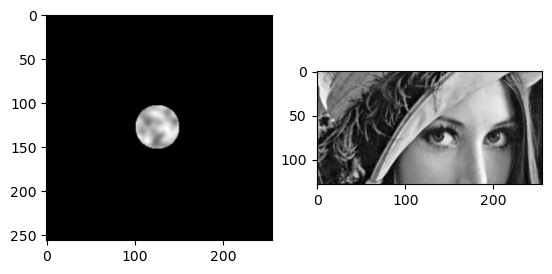

In [2]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')


lena = loadmat('lena.mat')['im1']
lena = lena.astype('float')

noisy_lena = np.clip(lena + np.random.normal(0, 2, lena.shape), 0, 255)

N, M = np.shape(im1)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(lena, cmap = 'gray')
im1.shape

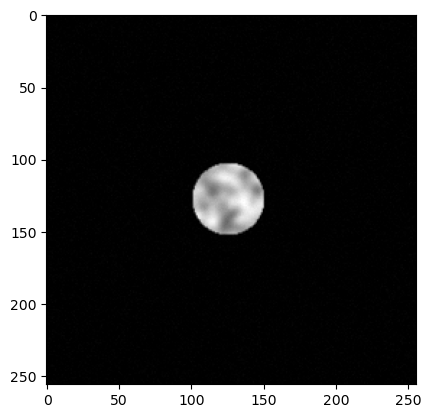

In [3]:
# Potentially add noise to the image
sigma = 2
gaussian_noise = np.random.normal(0, sigma, im1.shape)
noisy_im1 = np.clip(im1 + gaussian_noise, 0 , 255)
plt.figure(),plt.imshow(noisy_im1,cmap='gray')
print()

In the following, we apply a translation to the image. To do that, use the applyAffineMotion function which is already pre-implemented.

In [4]:
def fracMc(ref,mvf,outofbound=20):
    
    [rows, cols] = np.shape(ref);
    
    
    
    mc_c, mc_r = np.meshgrid(np.arange(cols),np.arange(rows)) # Initial coordinates, used to infer the new coordinates
    
    mc_r_tmp = mc_r + mvf[:,:,0] # Row coordinates, after the movement
    mc_c_tmp = mc_c + mvf[:,:,1] # Column coordinates, after the movement
    
    extension = outofbound
    #ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE)# Padded image
    ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REFLECT)# Padded image
    
    mc_r = mc_r_tmp + extension # Row coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    mc_c = mc_c_tmp + extension # Column coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    
    colMeshGrid, rowMeshGrid = np.meshgrid(np.arange(cols+2*extension),np.arange(rows+2*extension)) # Original coordinates, at which we know the data points
    
    
    # Put the input coordinates into the form of an array, to mach scipy format
    points = np.zeros((np.shape(ref)[0]*np.shape(ref)[1],2))
    points[:,0] = colMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    points[:,1] = rowMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    
    values = ref.reshape(np.shape(ref)[0]*np.shape(ref)[1])    
    
    
    # Put the coordinates in which we want ot do the interpolation into the form of an array, to mach scipy format
    points_inter = np.zeros((rows*cols,2))
    points_inter[:,0] = mc_c.reshape(rows*cols)
    points_inter[:,1] = mc_r.reshape(rows*cols)
    
    motcomp =  griddata(points, values, points_inter,'linear')
    
    motcomp = motcomp.reshape(rows,cols)

    return motcomp


def applyAffineMotion(x,b,B = np.zeros((2,2)),out = 100):
    N, M = np.shape(x)
    px, py = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1), np.arange(-(N-1)/2,(N-1)/2+1))
    
    mvfx = b[0] + B[0,0]*px + B[0,1]*py
    mvfy = b[1] + B[1,0]*px + B[1,1]*py
    
    mvf = np.zeros((np.shape(mvfx)[0],np.shape(mvfx)[1],2))
    mvf[:,:,1] = mvfx
    mvf[:,:,0] = mvfy
    
    y = fracMc(x,mvf,out)
    return y

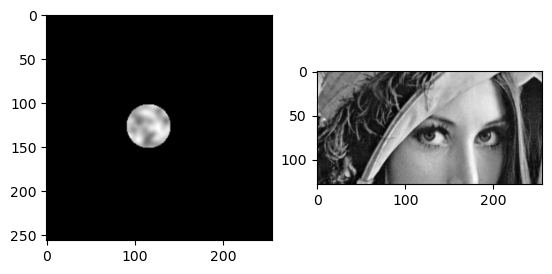

In [5]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

lena_trans = applyAffineMotion(lena, b)
noisy_lena_trans = applyAffineMotion(noisy_lena, b)
noisy_im2 = applyAffineMotion(noisy_im1, b)
im2 = applyAffineMotion(im1, b)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im2,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(lena_trans,cmap='gray')
plt.show()

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

**Answer:**

From the theory, we saw that by computing both DFT's from the original and the translated image we obtain a term containing the the horizontal and vertical translation displacement given by:

$$
\frac{\hat{B}(k_x,k_y)}{\hat{A}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

Now, note that we can easily get the phase from this term, which contains both displacement parameters. 
From computing the phase we will have an equation that is similar to a plane. By getting the slope of the plane we succesfully acquire the translation parameters




In [6]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

IM1_noisy = np.fft.fft2(noisy_im1)
IM2_noisy = np.fft.fft2(noisy_im2)

LENA = np.fft.fft2(lena)
LENA_TRANS = np.fft.fft2(lena_trans)

Compute the phase of the Fourier transform.

In [7]:
def angle2D(x):
    a = np.angle(x)
    
    b1 = np.unwrap(a,axis=0)
    b2 = np.unwrap(b1,axis=1)
    b3 = np.unwrap(a,axis=0)[:,::-1]
    b4 = np.unwrap(b3,axis=1)[:,::-1]
    
    y = (b2+b4)/2./(-2.*np.pi)
    return y

Text(0.5, 1.0, 'Phase of LENA_TRANS/LENA')

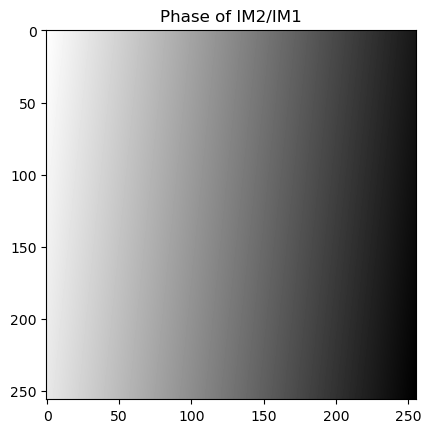

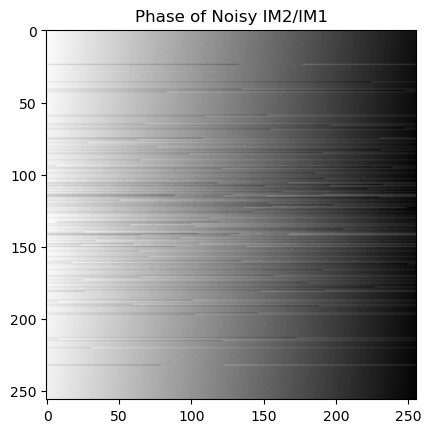

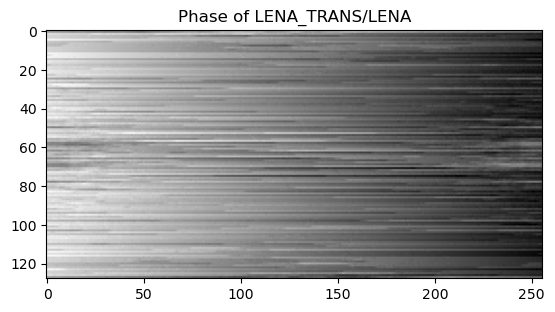

In [8]:
phi = angle2D(IM2/IM1)

plt.figure()
plt.imshow(phi, cmap = 'gray')
plt.title('Phase of IM2/IM1')

phi_noisy = angle2D(IM2_noisy/IM1_noisy)

plt.figure()
plt.imshow(phi_noisy, cmap = 'gray')
plt.title('Phase of Noisy IM2/IM1')

phi_lena = angle2D(LENA_TRANS/LENA)

plt.figure()
plt.imshow(phi_lena, cmap = 'gray')
plt.title('Phase of LENA_TRANS/LENA')

Display phi. Is it a linear plane and why?

**Answer:**

**Answer:**

The phase of the ratio of the two DFTs resembles a linear plane. Although noise in the image can introduce some irregularities, when plotting the phase (\(\phi\)) without noise, it clearly exhibits a linear behavior. This confirms the theoretical prediction, as the phase is given by $\phi = \frac{2\pi}{N}(ck_x + dk_y)$, a linear plane equation that directly encodes the translation parameters $c$ and $d$.

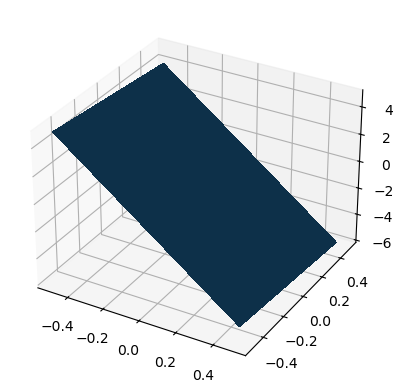

In [9]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)


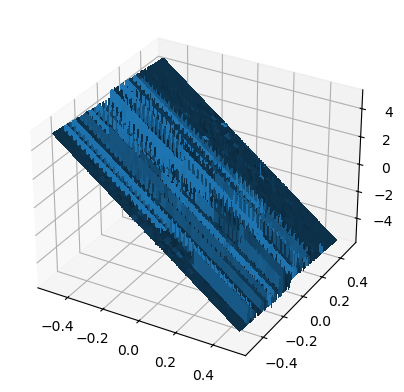

In [10]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi_noisy, linewidth=0, antialiased=False)


Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [11]:
def gradient(M,stepX=1.,stepY=1.):
# Computes the gradient of an image, over the rows and the column directions. StepY is the assumed gap between the rows and StepX is the assumed gap between the columns
    
    gy = np.diff(M, axis = 0)/stepY
    gx = np.diff(M, axis = 1)/stepX

    

    
    return gx,gy

In [12]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [13]:
print(GX)
print(GY)

-10.0
-1.0


In [14]:
#LENA

gx, gy = gradient(phi_lena,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)
print(GX)
print(GY)

-9.034491454891906
0.7481869460753643


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [15]:
def medianFilter(x,N):
    z = copyMakeBorder(x, N, N, N, N, BORDER_REPLICATE)
    y = np.zeros(np.shape(x))
    
    for r in range(np.shape(x)[0]):
        for c in range(np.shape(x)[1]):
            tmp = z[r:r+2*N+1,c:c+2*N+1]
            y[r,c] = np.median(tmp)
    return y

In [16]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [17]:
print(bEst)

[-9.99981832 -0.99999929]


**Relaunch the above code**:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

**Answer:**
For the ball image, its simplicity and consistently dark borders enable the method to work effectively, regardless of noise levels. However, the Lena image poses more challenges due to its intricate details and additional border information, which complicates the translation process. As a result, while the method still manages to estimate the translation parameters reasonably well, its accuracy noticeably decreases compared to the ball image.

# II-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. **You have to reuse here the functions that you implemented during the first practical work**. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

**Answer:**

Both approaches have performed well on the Lena and ball images. Although noise introduces a slight decrease in performance, the overall results remain robust. The block matching method, which relies on median filtering, appears to be more resilient to noise, and when the noise level becomes very high, it is necessary to adjust the search kernel accordingly. Additionally, in cases of non-integer translations, direct parametric estimation loses consistency because the ratio of the DFTs no longer presents a linear phase; in contrast, indirect parametric methods, especially block matching, yield better performance under these conditions.

In [18]:
#%%
def initVector(ref,cur):
    """
    Performs an initialization for the first regularizers

    Parameters
    ----------
    ref : np.array
        Reference image.
    cur : np.array
        Reference image.

    Returns
    -------
    pV : np.array (vector of size 2)
        Regularizer for displacement.

    """
    
    
    step = 8
    cont = 4*step
    
    REF = gaussian_filter(ref,1.) 
    CUR = gaussian_filter(cur,1.)
    
    CUR = CUR[cont+1:(np.shape(CUR)[0]-cont):step,cont+1:(np.shape(CUR)[1]-cont):step]
    SSDMIN = np.inf
    
    pV=np.zeros(2)
    
    for globR in range(-cont,cont):
        for globC in range(-cont,cont):
            RR = REF[cont+1-globR:(cont-globR+np.shape(CUR)[0]*step):step, cont+1-globC:(cont-globC+np.shape(CUR)[1]*step):step]
            SSD = np.sum((RR-CUR)**2)
            
            if SSD<SSDMIN:
                SSDMIN=SSD
                pV[0]=globR
                pV[1]=globC
                
                
    return pV

#%%
def computePredictor(r,c,brow,bcol,mvf,ref,cur):
    """
    compute predictor gives the median of the mvf of the blocks :
        - to the left of the current block
        - above the current block
        - upper left of the current block
        
    If such blocks do not exist due to the border effects, they are not taken into account.

    Parameters
    ----------
    See usage in the me_ssd function

    Returns
    -------
    pV : Median of the mvf of the neighboor blocks

    """
    if r < brow and c < bcol:
        pV = initVector(ref,cur)
        
    elif r < brow: # First row
        pV = mvf[r,c-bcol,:]
        
    elif c < bcol: # First column
        pV = mvf[r-brow,c,:]
        
    else: # Inside
        if c >= np.shape(mvf)[1]-bcol: # Last column
            vC = mvf[r-brow,c-bcol,:]
        
        else: # Not the last column
            vC = mvf[r-brow,c+bcol,:]
            
        vA = mvf[r,c-bcol,:]
        vB = mvf[r-brow,c,:]

        temp = np.array([vA, vB, vC]).T

        pV = np.median(temp,axis = 1)
        
    pV = pV.ravel()
    
    return pV


#%%
def me_ssd(cur, ref, brow, bcol, search, lamb=0):
    """
    ME BMA full search Motion estimation
    mvf, prediction = me_ssd(cur, ref, brow, bcol, search);

    A regularization constraint can be used
    mvf = me(cur, ref, brow, bcol, search, lambda);
    In this case the function minimize SAD(v)+lambda*error(v)
    where error(v) is the difference between the candidate vector v and the
    median of its avalaible neighbors.
 
    Code inspired from the one of Marco Cagnazzo


    Parameters
    ----------
    cur : numpy array
        Current (i.e. second) frame of the video.
    ref : numpy array
        Previous (i.e. first) frame of the video.
    brow : int
        Number of rows in each block.
    bcol : int
        Number of rows in each block.
    search : int
        Search radius
    lamb : double
        Regularization parameter

    Returns
    -------
    mvf : TYPE
        DESCRIPTION.
    prediction : TYPE
        DESCRIPTION.

    """
    
    extension = search
    
    ref_extended = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE) # To avoid border effect
    
    prediction = np.zeros(np.shape(cur));
    lamb *= brow*bcol;
    
    mvf = np.zeros((np.shape(cur)[0],np.shape(cur)[1],2))

    m, n = cur.shape
    
    # Non-regularized search
    if lamb == 0.:
        for r in range(0, m, bcol): # for each block in the current image, find the best corresponding block in the reference image
            for c in range(0, n, brow):
                # current block selection
                B = cur[r : r + brow, c : c + bcol] # Block
                
                # Initialization:
                
                costMin = np.inf
                
                Rbest = np.zeros((brow, bcol))

                # Loop on candidate displacement vectors
                for dcol in range(c-search,search+c): # dcol = candidate displacement vector over the columns
                    for drow in range(r-search,search+r):# rcol = candidate displacement vector over the rows
                        
                        B_ref = ref_extended[
                        extension + drow : extension +  brow + drow,
                        extension + dcol : extension +  bcol + dcol
                        ]

                        cost = np.linalg.norm(B - B_ref, ord=2)**2
                        
                        if cost <= costMin: # Save the results if they are better than the previous ones
                            costMin = cost
                            r_disp = drow
                            c_disp = dcol
                            Rbest = B_ref
                            
                mvf[r : r + brow, c : c + bcol,0] = r - r_disp # Once the loop is over, save the best row displacement field
                mvf[r : r + brow, c : c + bcol,1] = c - c_disp # Once the loop is over, save the best column displacement field
                prediction[r:r+brow,c:c+bcol] = Rbest 

                
    else: # Regularized search
        for r in range(0, m, brow) : # for each block in the current image, find the best corresponding block in the reference image
            for c in range(0, n , bcol) :
                # current block selection
                B = cur[r : r + brow, c : c + bcol] # Block

                # Initializations          
                
                costMin = np.inf
                Rbest = np.zeros((brow, bcol))
                
                # Neighbours : pV is the regularization vector. The regularizer must be such that the estimated displacement is not too far away from pV
                pV = computePredictor(r,c,brow,bcol,mvf,ref,cur) 
                
                # Loop on candidate vectors
                for dcol in range(c-search,search+c): # dcol = candidate displacement vector over the columns
                    for drow in range(r-search,search+r): # rcol = candidate displacement vector over the rows
                        
                        B_ref = ref_extended[
                        extension + drow : extension + brow + drow,
                        extension + dcol : extension + bcol + dcol
                        ]
                        
                        reg_term = lamb * np.sum(np.abs((np.array([drow, dcol]) - pV)))
                        ssd = np.linalg.norm(B - B_ref, ord=2)**2
                        cost = ssd + reg_term # here, encore the REGULARIZED cost function
                        if cost <= costMin: # Save the results if they are better than the previous ones
                            costMin = cost
                            r_disp = drow
                            c_disp = dcol
                            Rbest = B_ref
                
                
                mvf[r : r + brow, c : c + bcol,0] = r - r_disp  # Once the loop is over, save the best row displacement field
                mvf[r : r + brow, c : c + bcol,1] = c - c_disp  # Once the loop is over, save the best column displacement field
                prediction[r:r+brow,c:c+bcol]= Rbest
                
                
    mvf = -mvf # For compatibility with standards
                            
    return mvf, prediction

def displayMVF(I,mvf,subsamp,subplot=False):
    
    row,col = np.shape(I)
    
    # Subsample dense MVF 
    vectRow = mvf[0:row:subsamp,0:col:subsamp,0]
    vectCol = mvf[0:row:subsamp,0:col:subsamp,1]
    
    # Determine vector origins
    X,Y = np.meshgrid(np.arange(0,col,subsamp),np.arange(0,row,subsamp))
    X = X + np.floor(subsamp/2.)
    Y = Y + np.floor(subsamp/2.)
    
    # Show image
    if not subplot:
        plt.figure()
    plt.imshow(I,cmap='gray')

    plt.quiver(X, Y, vectCol,-vectRow)

    
    return

def fracMc(ref,mvf,outofbound=20):
    
    [rows, cols] = np.shape(ref);
    
    
    
    mc_c, mc_r = np.meshgrid(np.arange(cols),np.arange(rows)) # Initial coordinates, used to infer the new coordinates
    
    mc_r_tmp = mc_r + mvf[:,:,0] # Row coordinates, after the movement
    mc_c_tmp = mc_c + mvf[:,:,1] # Column coordinates, after the movement
    
    extension = outofbound
    #ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE)# Padded image
    ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REFLECT)# Padded image
    
    mc_r = mc_r_tmp + extension # Row coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    mc_c = mc_c_tmp + extension # Column coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    
    colMeshGrid, rowMeshGrid = np.meshgrid(np.arange(cols+2*extension),np.arange(rows+2*extension)) # Original coordinates, at which we know the data points
    
    
    # Put the input coordinates into the form of an array, to mach scipy format
    points = np.zeros((np.shape(ref)[0]*np.shape(ref)[1],2))
    points[:,0] = colMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    points[:,1] = rowMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    
    values = ref.reshape(np.shape(ref)[0]*np.shape(ref)[1])    
    
    
    # Put the coordinates in which we want ot do the interpolation into the form of an array, to mach scipy format
    points_inter = np.zeros((rows*cols,2))
    points_inter[:,0] = mc_c.reshape(rows*cols)
    points_inter[:,1] = mc_r.reshape(rows*cols)
    
    motcomp =  griddata(points, values, points_inter,'linear')
    
    motcomp = motcomp.reshape(rows,cols)

    return motcomp

def computeDerivatives(im1, im2):
    kernel1D = np.expand_dims((1./12.)*np.array([-1., 8., 0., -8., 1.]),axis=1).T
    fx = convolve2d(im1,kernel1D,'same')
    fy = convolve2d(im1,kernel1D.T,'same')
    ft = convolve2d(im1, 0.25*np.ones((2,2)),'same') + convolve2d(im2, -0.25*np.ones((2,2)),'same');
    fx =-fx;
    fy=-fy;

    return fx, fy, ft


#%%
def HS(im1, im2, uInitial, vInitial, alpha=1, ite=100,blur = 1.):
    """
    Horn-Schunck optical flow method.
    Horn, B.K.P., and Schunck, B.G., Determining Optical Flow, AI(17), No. 1-3, August 1981, pp. 185-203 http://dspace.mit.edu/handle/1721.1/6337
    
    [u, v] = HS(im1, im2, alpha, ite, uInitial, vInitial, displayFlow)
    
    Parameters
    ----------
    im1, im2 : np.array
        Two subsequent frames or images.
    uInitial, vInitial: np.array
        Initial values for the (u,v) flow. If well initialized, the flow would converge faster and hence would need less iterations.
    alpha : scalar
        A parameter that reflects the influence of the smoothness term.
    ite : int
        Number of iterations.

    Returns
    -------
    u,v : np.array
        Optical flow.
    """
    
    im1 = gaussian_filter(im1,blur)
    im2 = gaussian_filter(im2,blur)
    
    # Set initial value for the flow vectors
    u = uInitial.copy()
    v = vInitial.copy()
    
    # Estimate spatiotemporal derivatives
    fx, fy, ft = computeDerivatives(im1, im2)
    
    # Averaging kernel
    kernel_1=np.array([[1./12., 1./6., 1./12.],[1./6., 0., 1./6.],[1./12., 1./6., 1./12.]])
    
    for i in range(ite):
        # Compute local averages of the flow vectors using kernel_1
        uAvg = convolve2d(u, kernel_1, 'same')
        vAvg = convolve2d(v, kernel_1, 'same')
        
        # Compute flow vectors constrained by its local average and the optical flow constraints
        den = alpha**2 + np.sum(fx**2 + fy**2) 
        num = uAvg*fx + vAvg*fy + ft
        u = uAvg - fx * num/den
        v = vAvg - fy * num/den
        
    u[np.isnan(u)]= 0
    v[np.isnan(v)]= 0
    return u, v

9.0
9.0


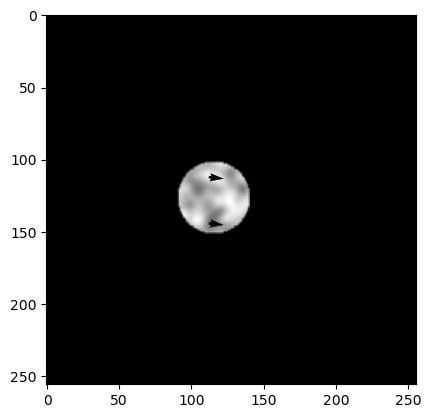

In [19]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

1.5
0.0


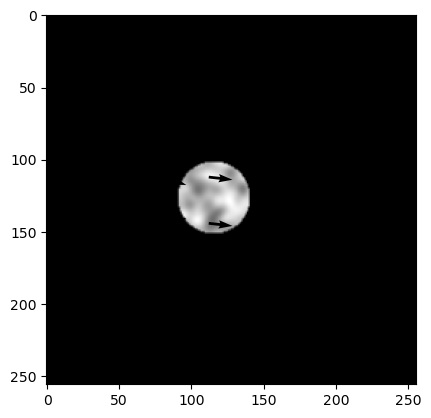

In [20]:
#with noise

lamb = 0
mvf,prediction = me_ssd(noisy_im2,noisy_im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

1.0172659655286034
0.07422460032092645


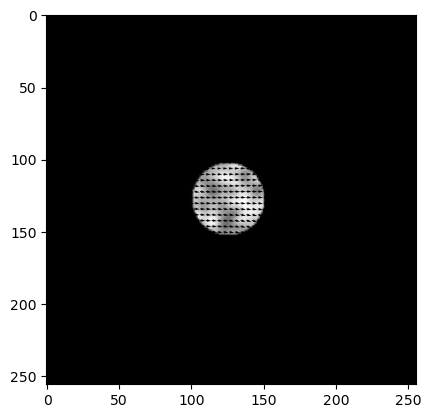

In [21]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)

1.0172571824191574
0.07401608397692774


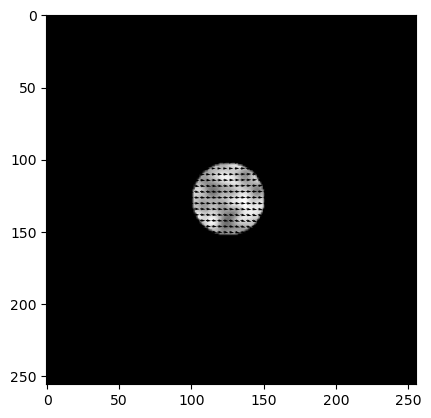

In [22]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(noisy_im2, noisy_im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)

9.0
1.0


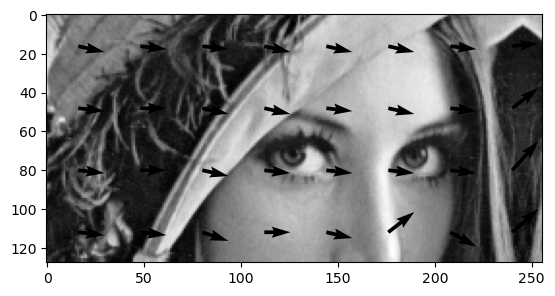

In [23]:
lamb = 0
mvf,prediction = me_ssd(lena_trans,lena,32,32,10,lamb)
displayMVF(lena_trans,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

8.96309037921078
0.9285302179350563


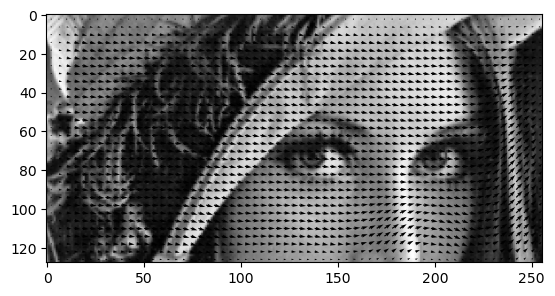

In [24]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(lena_trans, lena, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(lena,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)

9.0
1.0


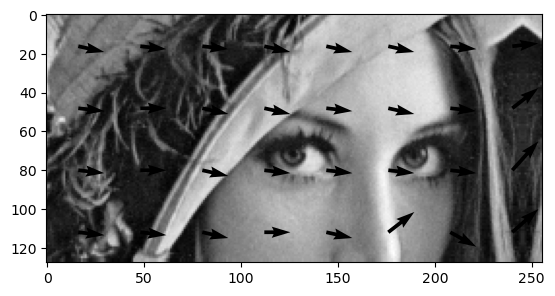

In [25]:
lamb = 0
mvf,prediction = me_ssd(noisy_lena_trans,noisy_lena,32,32,10,lamb)
displayMVF(noisy_lena_trans,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

8.963317978548993
0.9209843804526829


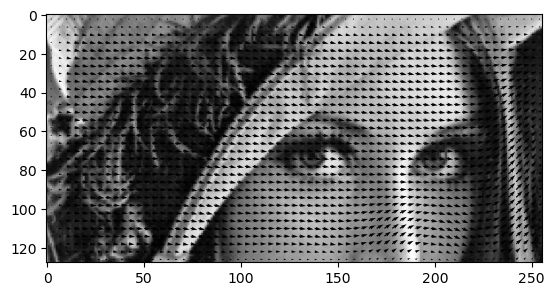

In [26]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(noisy_lena_trans, noisy_lena, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(lena,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)